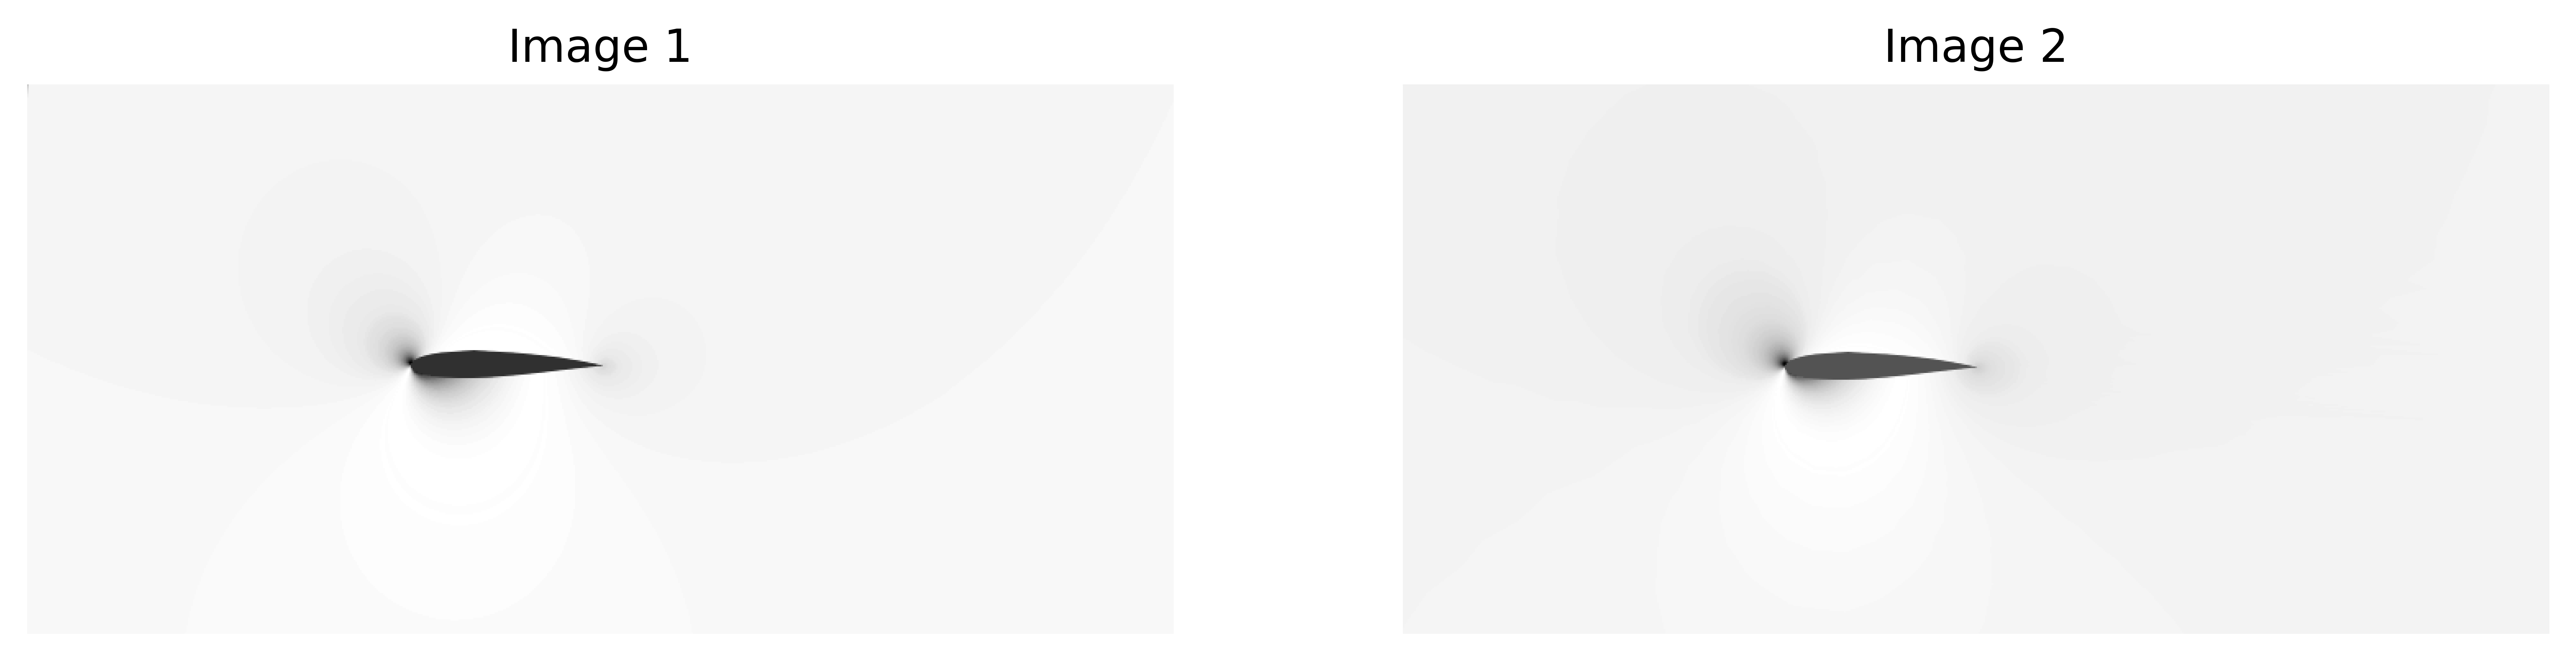

In [47]:
# read image airfRANS_cropped_p.png
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def load_and_display_image(image1path, image2path):
    """
    Load an image from the specified path and display it.
    
    Parameters:
    image_path (str): Path to the image file.
    """
    # Load the image
    image1 = Image.open(image1path)
    image2 = Image.open(image2path)
    image1 = image1.convert('L')  # Convert to grayscale
    image2 = image2.convert('L')  # Convert to grayscale
    image_array = np.array(image1)
    image_array2 = np.array(image2)
    # crop image starting from x 255 y 220 and width700x height350
    image_array = image_array[220:555, 256:955]
    image_array2 = image_array2[220:555, 256:955]
    
    # Display the image
    plt.figure(figsize=(12, 12), dpi=1000)
    plt.subplot(1, 2, 1)
    plt.imshow(image_array, cmap='gray')
    plt.axis('off')  # Hide axes
    plt.title('Image 1')
    plt.subplot(1, 2, 2)
    plt.imshow(image_array2, cmap='gray')
    plt.axis('off')  # Hide axes
    plt.title('Image 2')
    plt.show()
    return image_array, image_array2

# Load the image
image_path = './sample_data/sample_000000000_p.png'
image_path_lowresolution = './sample_data_lowres/sample_000000000_p.png'

image_array, image_array2 = load_and_display_image(image_path, image_path_lowresolution)


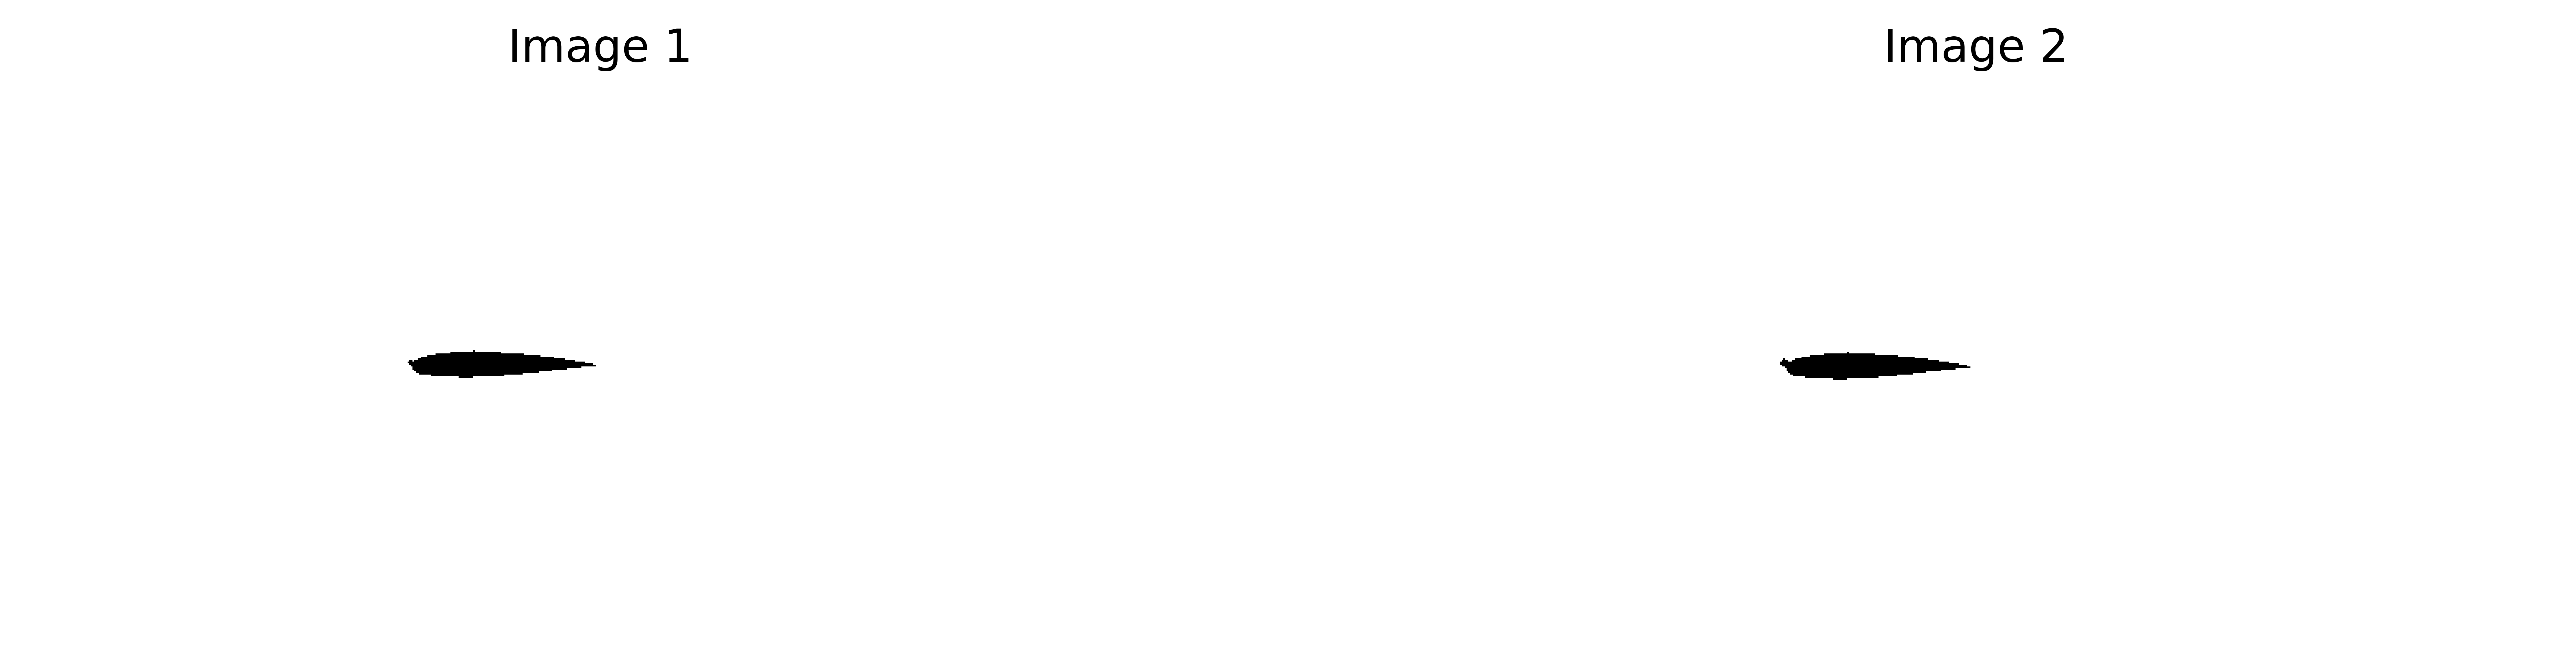

In [83]:

from skimage.util import img_as_float

def mask_image(image_array):
    return_img = []
    for img in image_array:
        normalized_image_array = img_as_float(img)
        mask = normalized_image_array > 0.34509901
        masked_img = img * mask
        masked_img = np.round(masked_img, 1)
        return_img.append(mask)

    # plot the masked image
    plt.figure(figsize=(12, 12), dpi=1000)
    plt.subplot(1, 2, 1)
    plt.imshow(return_img[0], cmap='gray')
    plt.axis('off')  # Hide axes
    plt.title('Image 1')
    plt.subplot(1, 2, 2)
    plt.imshow(return_img[1], cmap='gray')
    plt.axis('off')  # Hide axes
    plt.title('Image 2')
    plt.show()
    return return_img

masked_images = mask_image([image_array, image_array2])


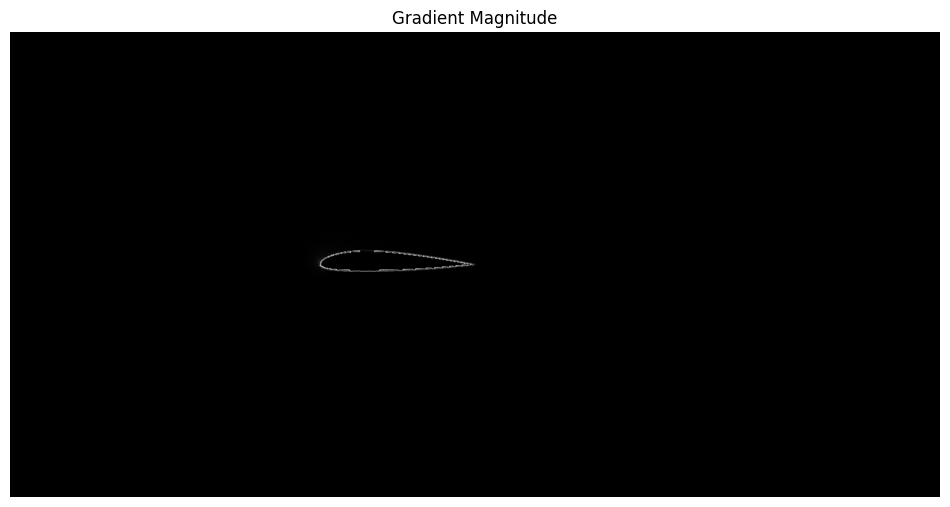

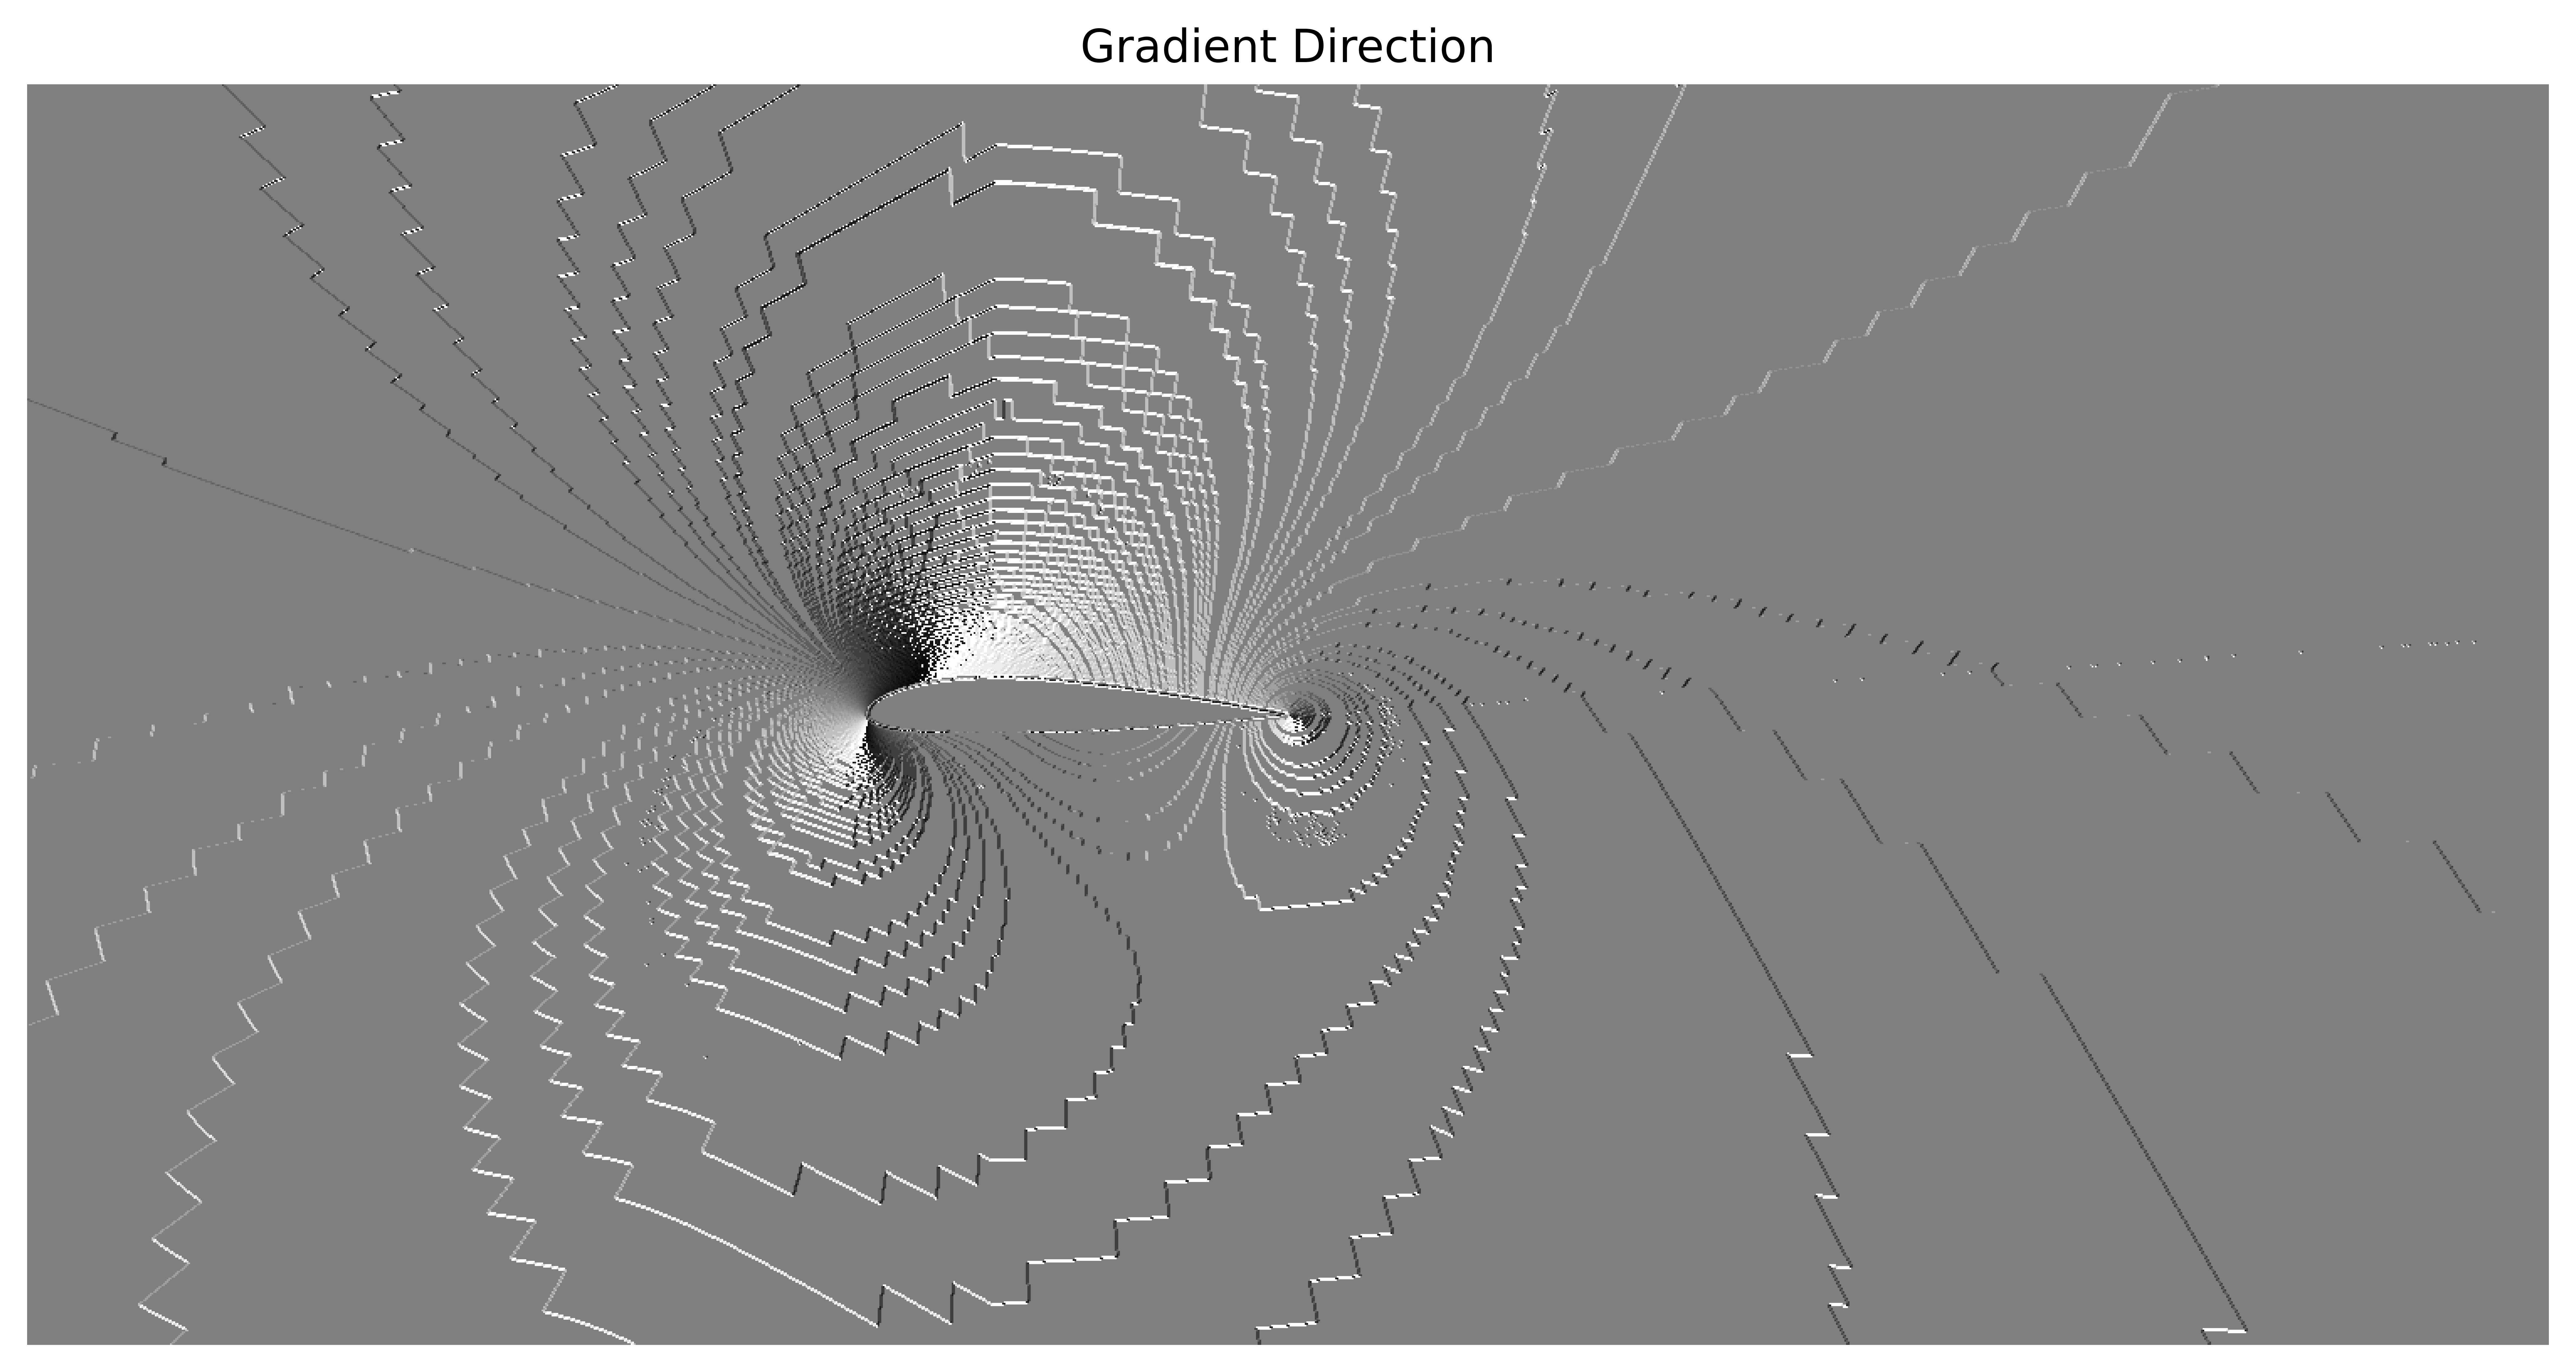

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

gx, gy = np.gradient(masked_img)

# Compute gradient magnitude
grad_mag = np.sqrt(gx**2 + gy**2)

# Plotting gradient magnitude
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.axis('off')
ax.imshow(grad_mag, cmap='gray')
ax.set_title('Gradient Magnitude')
plt.show()

# calculate the gradient direction
grad_dir = np.arctan2(gy, gx)
# Plotting gradient direction
fig, ax = plt.subplots(1, 1, figsize=(12, 12), dpi= 1000)
ax.axis('off')
ax.imshow(grad_dir, cmap='gray')
ax.set_title('Gradient Direction')
plt.show()  

Number of unique values in the image: 186
Unique values in normalized image array: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


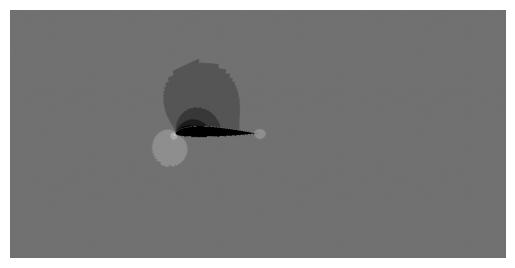

Normalized image array shape: (750, 1500)


In [40]:
# from image_array get number of unique values 
unique_values = np.unique(masked_img)
print(f'Number of unique values in the image: {len(unique_values)}') 
# convert 0 - 255 to 0 - 1
normalized_image_array = masked_img / 255.0
# round to 2 decimal places
normalized_image_array = np.round(normalized_image_array, 1)
# print(f'Normalized image array (rounded to 2 decimal places):\n{normalized_image_array}')
print(f'Unique values in normalized image array: {np.unique(normalized_image_array)}')

# show the normalized image
plt.imshow(normalized_image_array, cmap='gray')
plt.axis('off')  # Hide axes
plt.show()
print(f'Normalized image array shape: {normalized_image_array.shape}')

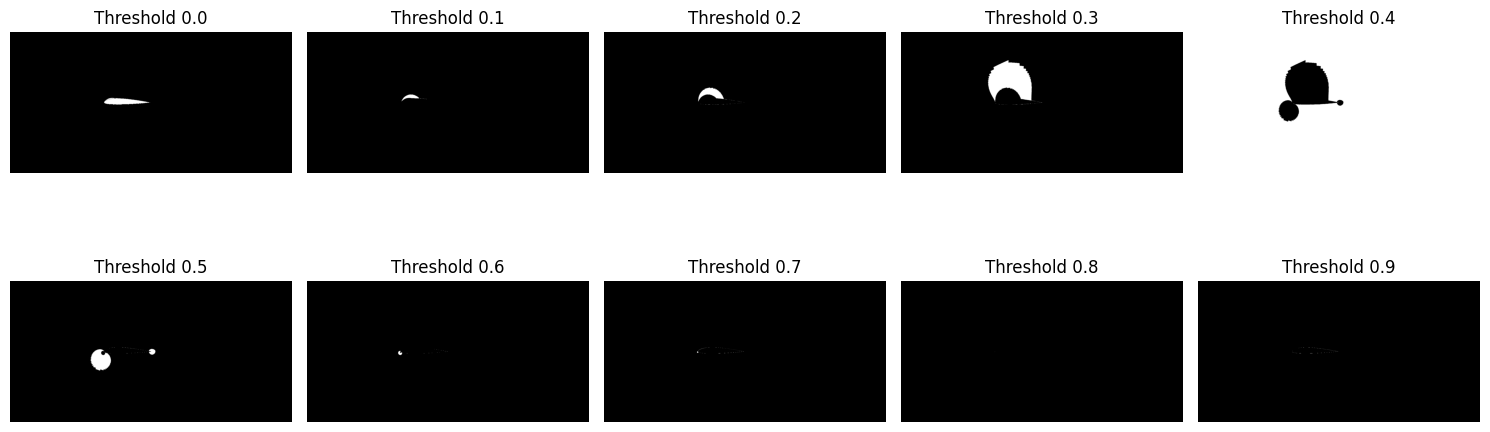

In [41]:
unique_thresholds = np.unique(normalized_image_array)
n = len(unique_thresholds)
cols = 5
rows = int(np.ceil(n / cols))

fig, axes = plt.subplots(rows, cols, figsize=(15, 3 * rows))
axes = axes.flatten()

for idx, i in enumerate(unique_thresholds):
    thresholded_image = (normalized_image_array == i).astype(float)
    axes[idx].imshow(thresholded_image, cmap='gray')
    axes[idx].set_title(f'Threshold {i}')
    axes[idx].axis('off')

# Hide any unused subplots
for idx in range(n, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()